# Movies Database
### EDA and Correlation




The basic objective of this analysis is to figure out the main reasons of a movie being successful and grossing more.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
# In case of a file read error due to a different file encoding

import chardet
with open('movies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

print(result['encoding'])
# df = pd.read_csv('movies.csv',engine='python',encoding=result['encoding'])

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
ISO-8859-1


In [3]:
# Read the data into a DataFrame

df = pd.read_csv('movies.csv',engine='python')

In [4]:
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [6]:
# Let's loop through the data and get the number missing values in each column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [7]:
# Sorting data by gross revenue
df.sort_values(by=['gross'], ascending=False, inplace=True)
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
4840,185000000.0,Warner Bros.,USA,Christopher Nolan,Action,534858444.0,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008
6614,200000000.0,Lucasfilm,USA,Gareth Edwards,Action,532177324.0,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016
6687,200000000.0,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561.0,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016
2870,115000000.0,Lucasfilm,USA,George Lucas,Action,474544677.0,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,584809,George Lucas,1999
6398,250000000.0,Marvel Studios,USA,Joss Whedon,Action,459005868.0,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015


In [8]:
# Dropping duplicate rows(if any)

df.drop_duplicates(inplace=True)

### Correlation

##### Pearson Correlation - 
Measures the strength (0 to 1) and direction (negative or positive) of the linear relationship between two (or in this case more) variables.
Key assumptions:
1. the data is interval or ratio
2. the relationship is linear (due to two variables), so the correlation is only approximate,
3. outliers affect the correlation (for instance, see at 35:11 the red dot well above the blue line at budget = 2.45, gross = 9.5), and
4. the data is normally distributed (which is a common statistics assumption- Assumption of Normality => that bell curve shape.).

##### Spearman Correlation -
Same as Pearson, but:
1. The model does not rely on normality (Assumption 4), and
2. The data can be ordinal (Assumption 1).

##### Kendall Correlation -
Same as Spearman, but:
1. The data can be continuous (Assumption 1),

Pearson appears to be the flagship of correlation analysis, whereas Spearman and Kendall correlations can be  more robust when considering nonlinear relationships.


<AxesSubplot:>

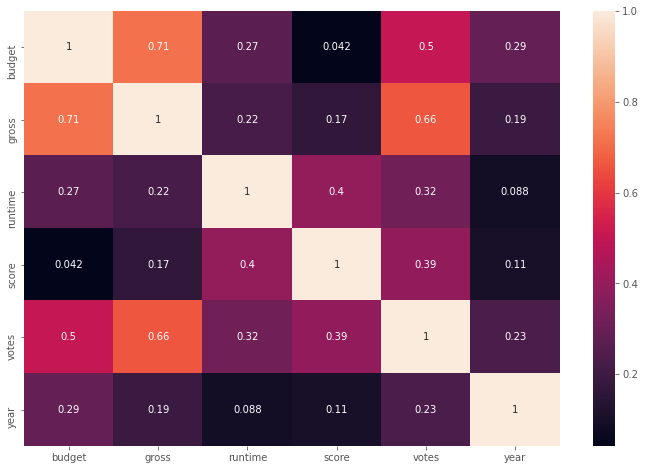

In [9]:
# Let us plot correlation between all the numeric column

sns.heatmap(df.corr(),annot=True)

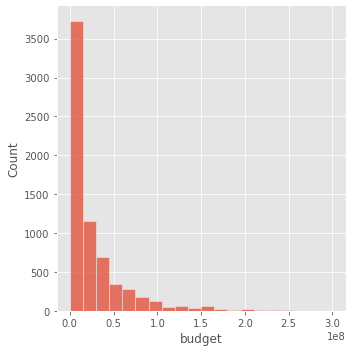

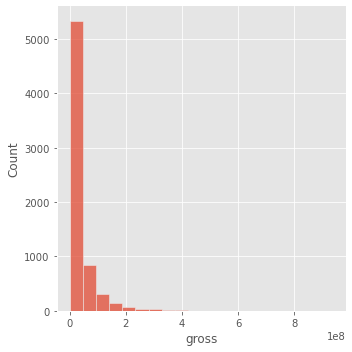

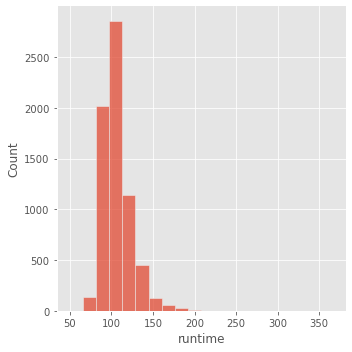

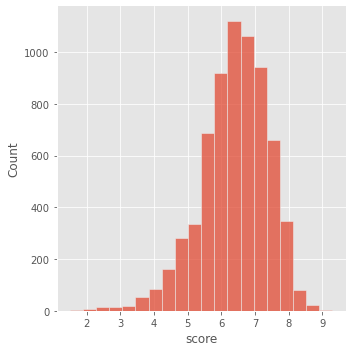

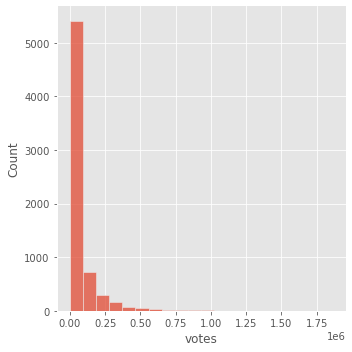

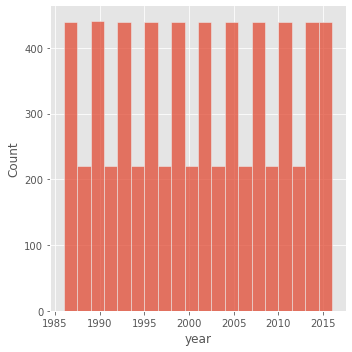

In [10]:
for col in df.columns:
    if df[col].dtype !="object":
        sns.displot(df[col],bins=20)
        plt.show()

In [11]:
# Let us change the data of categorical columns into numerical values

df_num = df.copy()
for col in df_num.columns:
    if(df_num[col].dtype == 'object'):
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes

df_num.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,1428,54,1037,0,936662225.0,4679,7,2290,136,8.1,475,687192,2356,2015
5061,237000000.0,2062,53,1066,0,760507625.0,501,7,1800,162,7.8,2084,954412,1629,2009
2420,200000000.0,2062,54,1066,6,658672302.0,6177,7,910,194,7.8,1444,862554,1629,1997
6391,150000000.0,2085,54,466,0,652270625.0,2721,7,2247,124,7.0,404,469200,3310,2015
5723,220000000.0,1491,54,1412,0,623357910.0,4995,7,1987,143,8.1,2001,1064633,2145,2012


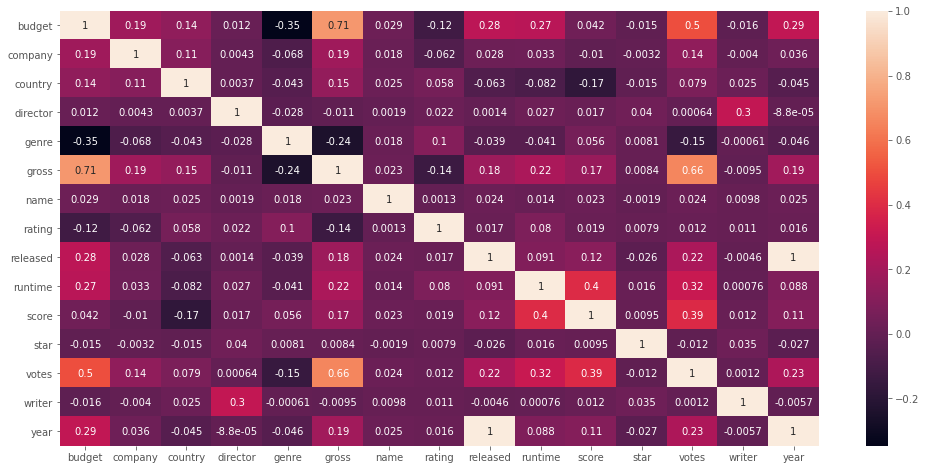

In [12]:
# Plotting the correlation matrix with the new values

plt.figure(figsize=(17,8))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [13]:
# Removing the maximum row visibility limit in pandas

pd.set_option("display.max_rows",None)

In [14]:
# Unstacking the values in the correlation matrix to get the correlation values in a single column 

corr_matrix = df_num.corr()
corr_values = corr_matrix.unstack()
corr_values

budget    budget      1.000000
          company     0.187205
          country     0.137635
          director    0.011602
          genre      -0.346794
          gross       0.712196
          name        0.028712
          rating     -0.119660
          released    0.276635
          runtime     0.268226
          score       0.042145
          star       -0.015061
          votes       0.503924
          writer     -0.015611
          year        0.291009
company   budget      0.187205
          company     1.000000
          country     0.107950
          director    0.004320
          genre      -0.068330
          gross       0.187220
          name        0.018098
          rating     -0.062250
          released    0.027898
          runtime     0.033058
          score      -0.010426
          star       -0.003160
          votes       0.138662
          writer     -0.004032
          year        0.036272
country   budget      0.137635
          company     0.107950
        

In [15]:
sorted_values = corr_values.sort_values()
sorted_values

budget    genre      -0.346794
genre     budget     -0.346794
          gross      -0.242676
gross     genre      -0.242676
country   score      -0.174414
score     country    -0.174414
votes     genre      -0.150519
genre     votes      -0.150519
rating    gross      -0.135538
gross     rating     -0.135538
rating    budget     -0.119660
budget    rating     -0.119660
runtime   country    -0.081796
country   runtime    -0.081796
genre     company    -0.068330
company   genre      -0.068330
country   released   -0.062609
released  country    -0.062609
company   rating     -0.062250
rating    company    -0.062250
genre     year       -0.046259
year      genre      -0.046259
country   year       -0.045204
year      country    -0.045204
country   genre      -0.042793
genre     country    -0.042793
runtime   genre      -0.041357
genre     runtime    -0.041357
          released   -0.039179
released  genre      -0.039179
director  genre      -0.027668
genre     director   -0.027668
year    

Correlation Values:

0+      No linear relationship

0.30+   A weak uphill (positive) linear relationship

0.50+   A moderate uphill (positive) relationship

0.70+   A strong uphill (positive) linear relationship

1.0     A perfect uphill (positive) linear relationship

In [16]:
# Let us take the parameters with high correlation values

highcorr = sorted_values[sorted_values > 0.5]
highcorr

votes     budget      0.503924
budget    votes       0.503924
votes     gross       0.662457
gross     votes       0.662457
budget    gross       0.712196
gross     budget      0.712196
released  year        0.996187
year      released    0.996187
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

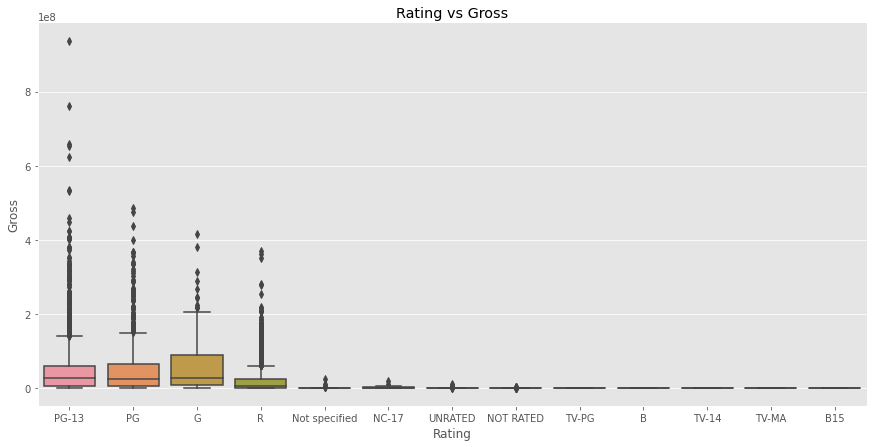

In [17]:
# Let us try to see if there is any relationship between budget and gross of a movie

sns.catplot(x="rating", y="gross", kind="box", data=df , height=6,aspect=2)
plt.title("Rating vs Gross")
plt.xlabel("Rating")
plt.ylabel("Gross")

plt.show()

Movies with rating 'PG-13', 'PG', 'G' and 'R' are released in cinemas.

We can see that the movies that are released in cinemas usually earn a lot more than those released on TV.

Also, the movies that are unrated or that do not apply for a rating, are not released on TV or in cinemas, hence do not earn well.

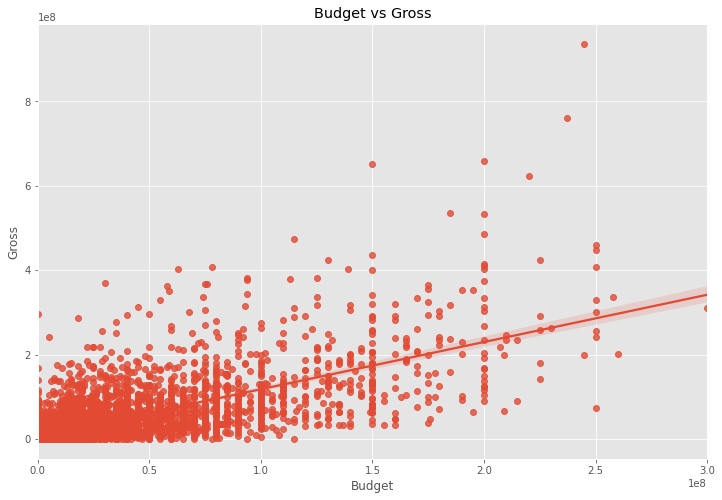

In [18]:
# Let us try to see if there is any relationship between budget and gross of a movie

sns.regplot(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

The overall trend suggests a linear trend for a movie's gross for a given budget.

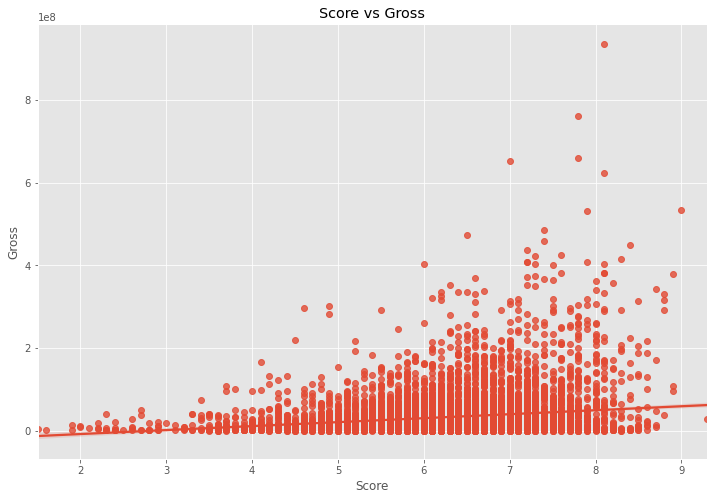

In [19]:
# Let us try to see if there is any relationship between score and gross of a movie

sns.regplot(x=df['score'],y=df['gross'])
plt.title("Score vs Gross")
plt.xlabel("Score")
plt.ylabel("Gross")
plt.show()

In [20]:
companygross = df.groupby(['company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)
companygross = companygross.reset_index()
companygross[:20]

<ipython-input-20-0424f71cbedc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  companygross = df.groupby(['company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)


,company,budget,gross
0,Warner Bros.,1.659370e+10,2.132232e+10
1,Universal Pictures,1.383213e+10,1.943005e+10
2,Paramount Pictures,1.165660e+10,1.711570e+10
3,Twentieth Century Fox Film Corporation,9.859100e+09,1.478857e+10
4,Walt Disney Pictures,7.561200e+09,1.045551e+10
5,Columbia Pictures,7.251900e+09,8.824217e+09
6,New Line Cinema,5.329700e+09,8.540112e+09
7,Columbia Pictures Corporation,6.169807e+09,7.720114e+09
8,Touchstone Pictures,3.952200e+09,6.688156e+09
9,DreamWorks,3.880200e+09,5.458121e+09


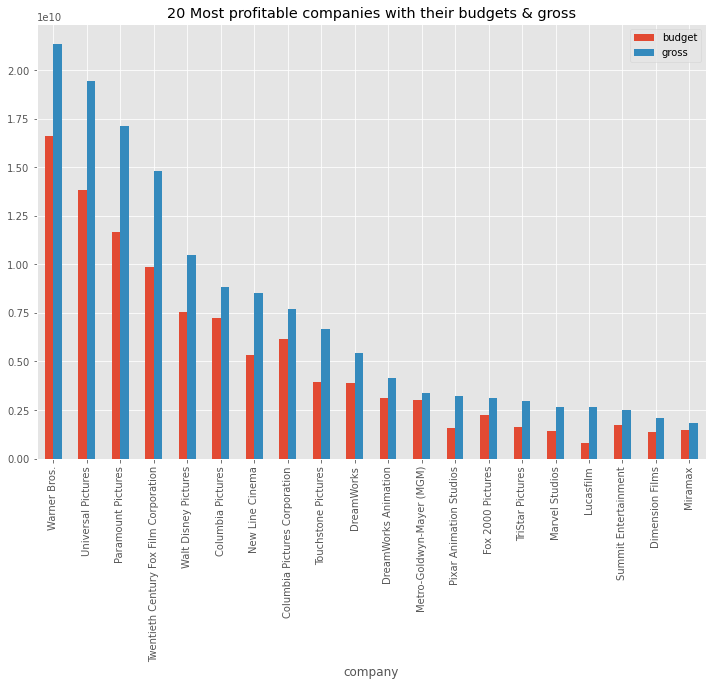

In [21]:
# Let us check the gross earnings of the top 20 companies for their budget

companygross[:20].plot(x='company', y=['budget','gross'], kind="bar")
plt.title("20 Most profitable companies with their budgets & gross")

plt.show()

In [22]:
# Let us now check the relationship between genre and gross

genre_gross=df.groupby(['genre'])['gross'].sum()
genre_gross=genre_gross.to_frame()

genre_gross.reset_index(inplace=True)
genre_gross

,genre,gross
0,Action,7.479263e+10
1,Adventure,2.089509e+10
2,Animation,2.534220e+10
3,Biography,8.617527e+09
4,Comedy,5.354342e+10
5,Crime,1.021784e+10
6,Drama,2.520462e+10
7,Family,1.181102e+08
8,Fantasy,6.446531e+08
9,Horror,7.117847e+09


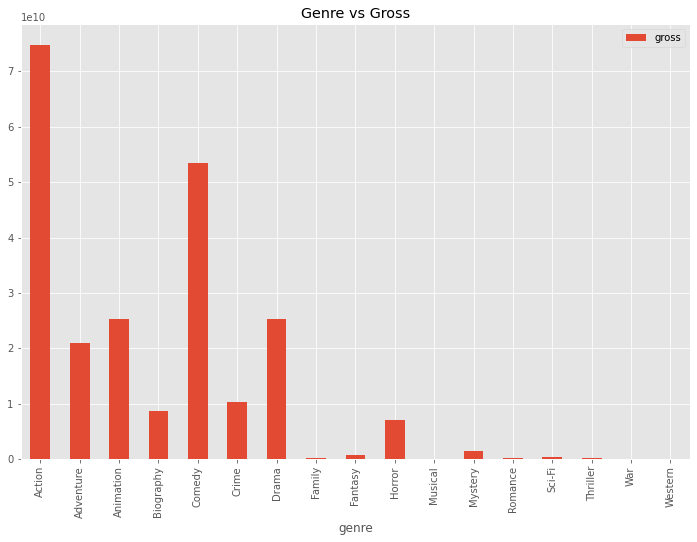

In [23]:
genre_gross.plot(x='genre', y='gross', kind="bar")
plt.title("Genre vs Gross")

plt.show()


In [24]:
# Let us get the list of top 20 directors whose movies have grossed the highest

director_gross = df.groupby(['director'])['gross'].sum()
director_gross = director_gross.reset_index()
director_gross.sort_values(by='gross',ascending=False,inplace=True)
director_gross[:20]

,director,gross
2488,Steven Spielberg,2.890693e+09
1758,Michael Bay,2.196162e+09
2045,Peter Jackson,2.134382e+09
1066,James Cameron,1.909927e+09
440,Christopher Nolan,1.816485e+09
2566,Tim Burton,1.798737e+09
2241,Robert Zemeckis,1.788742e+09
397,Chris Columbus,1.750259e+09
2268,Ron Howard,1.725829e+09
1037,J.J. Abrams,1.684205e+09


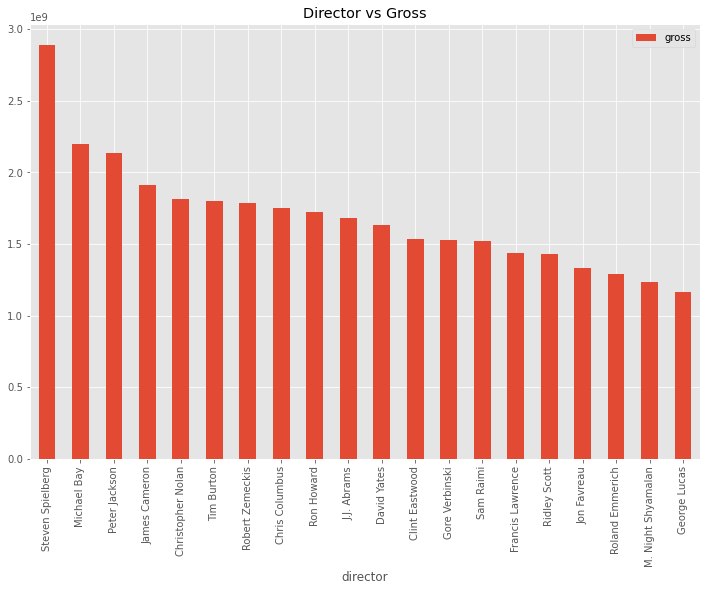

In [25]:
director_gross[:20].plot(x='director', y='gross', kind="bar")
plt.title("Director vs Gross")

plt.show()

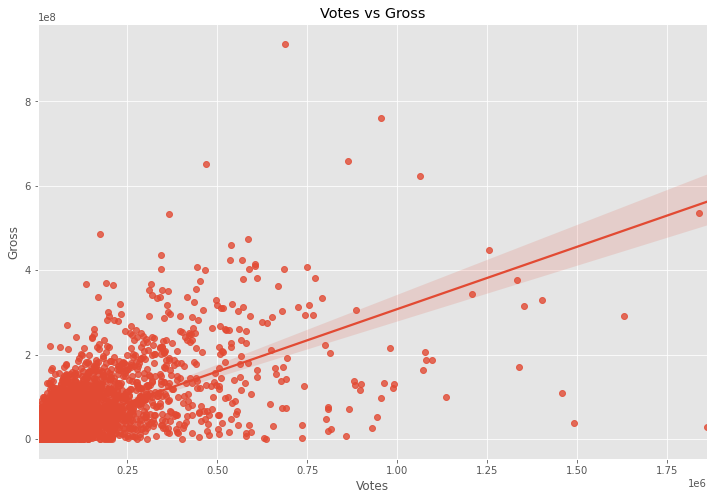

In [26]:
# Let us plot relationship between votes and gross of a movie

sns.regplot(x=df['votes'],y=df['gross'])
plt.title("Votes vs Gross")
plt.xlabel("Votes")
plt.ylabel("Gross")
plt.show()